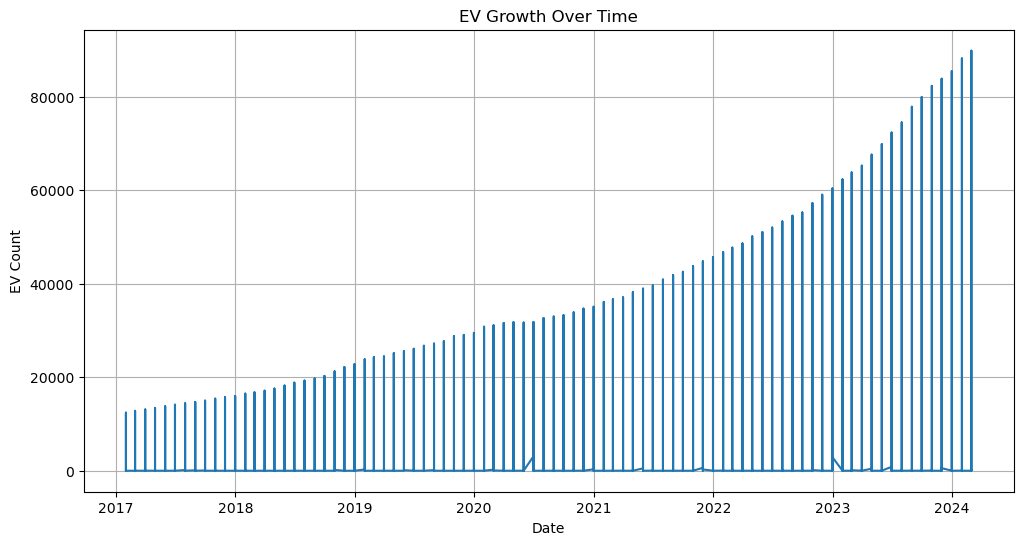

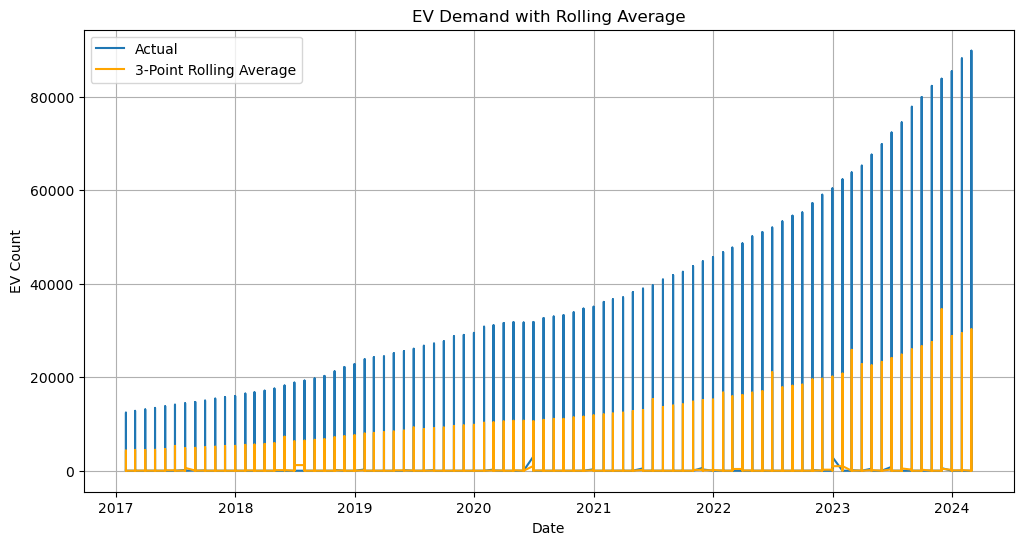

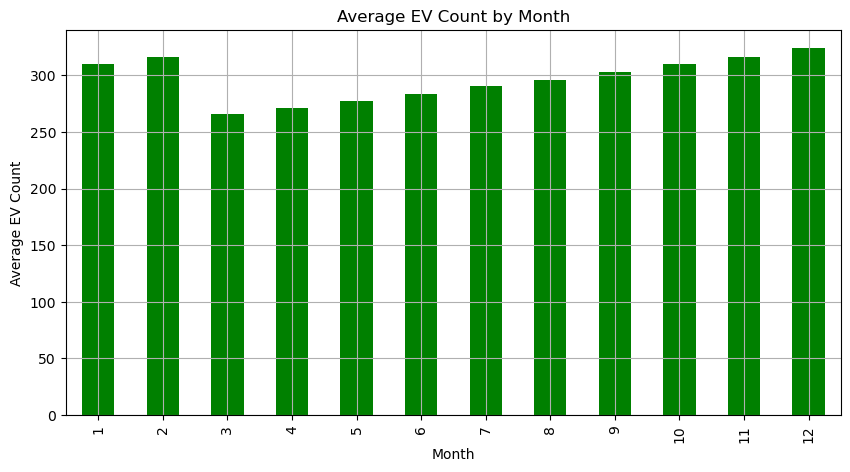

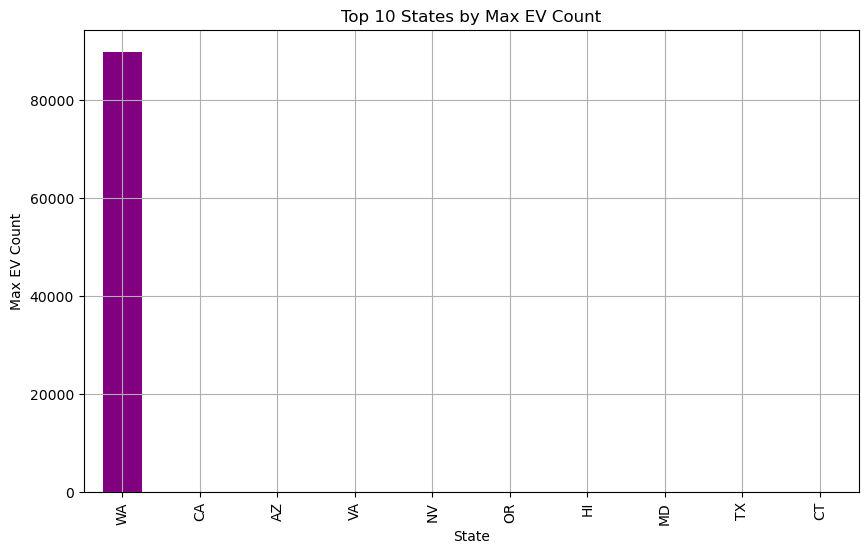

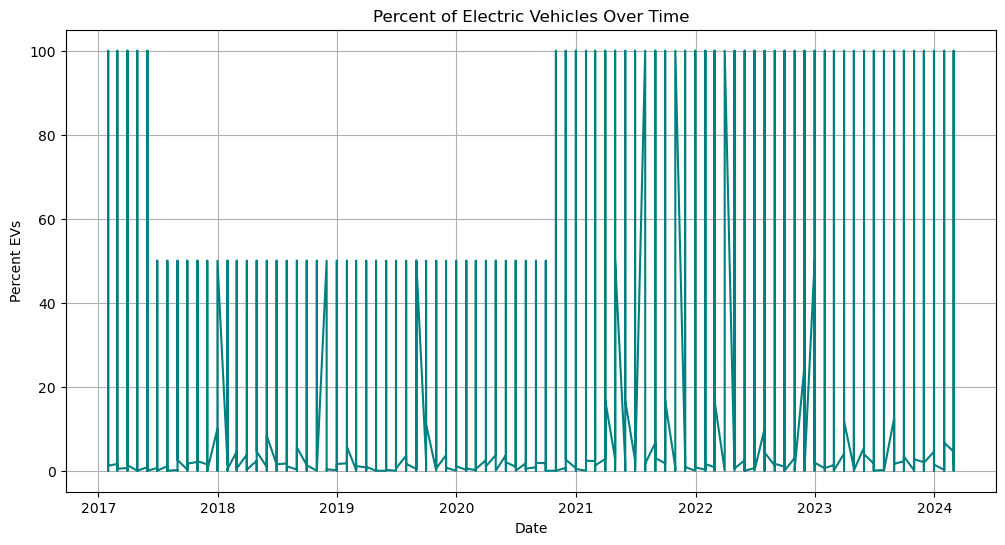

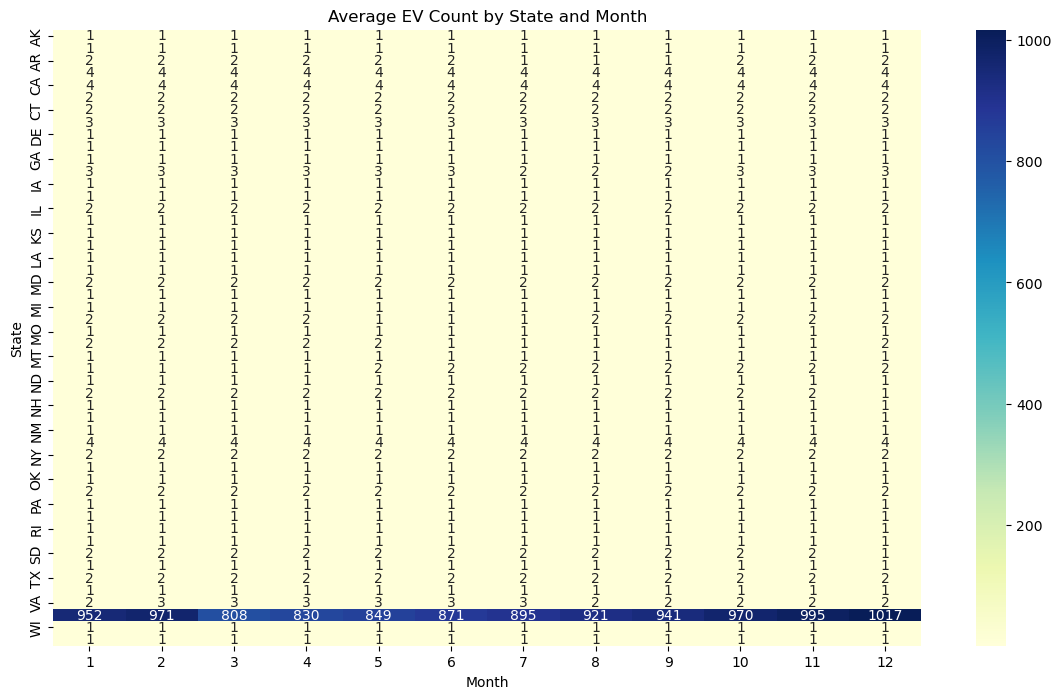

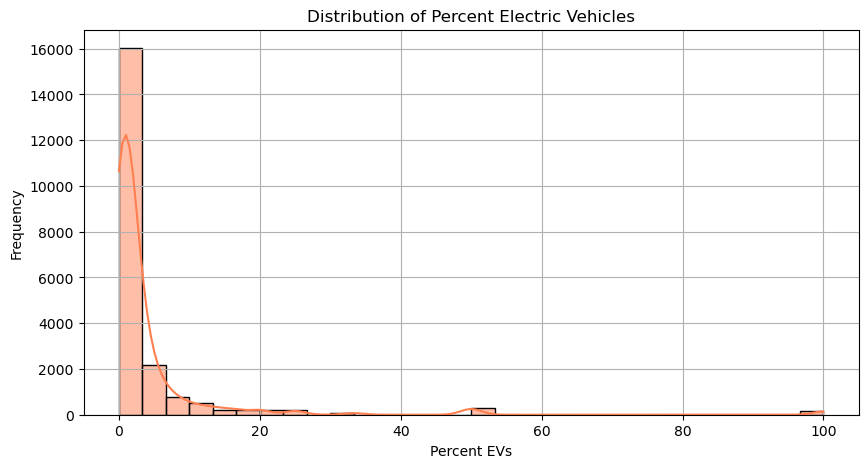

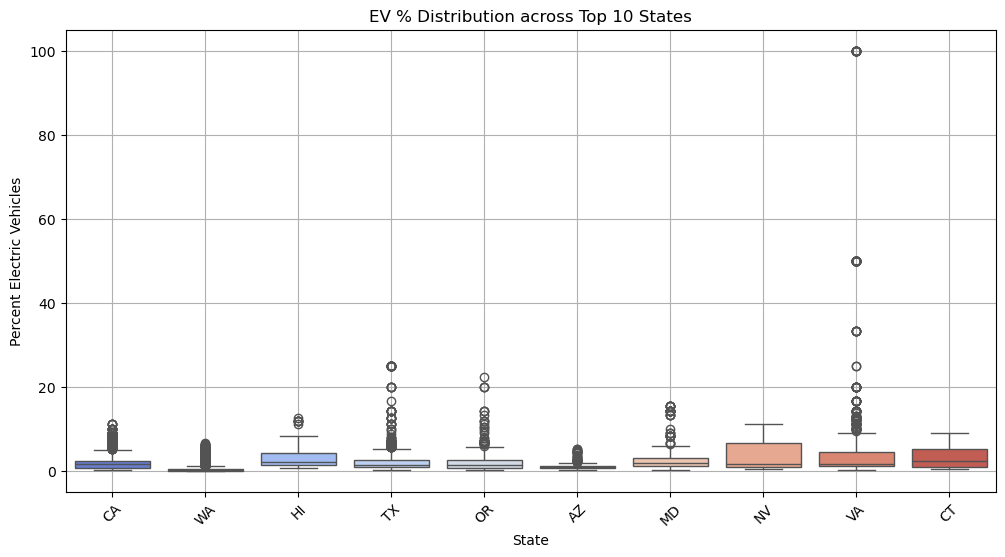

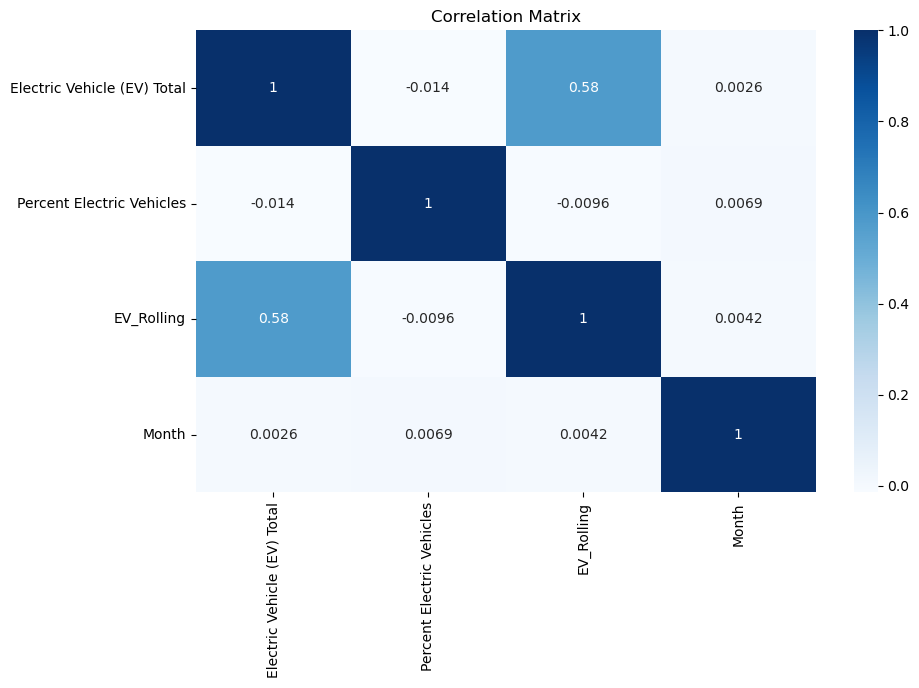

In [1]:
#Imported Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loaded Dataset
df = pd.read_csv("3ae033f50fa345051652.csv")

#Step 1: Parse Dates
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

#Step 2: Convert 'EV Total' Column to Numeric (remove commas)
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].str.replace(',', '', regex=False).astype(float)

# 🔹 Step 3: Line Plot – EV Growth Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Electric Vehicle (EV) Total'])
plt.title('EV Growth Over Time')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.grid(True)
plt.show()

#Step 4: Rolling Average Plot
df['EV_Rolling'] = df['Electric Vehicle (EV) Total'].rolling(window=3).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Electric Vehicle (EV) Total'], label='Actual')
plt.plot(df['EV_Rolling'], label='3-Point Rolling Average', color='orange')
plt.title('EV Demand with Rolling Average')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.legend()
plt.grid(True)
plt.show()

#Step 5: EV Count by Month
df['Month'] = df.index.month
df_monthly = df.groupby('Month')['Electric Vehicle (EV) Total'].mean()
plt.figure(figsize=(10,5))
df_monthly.plot(kind='bar', color='green')
plt.title('Average EV Count by Month')
plt.xlabel('Month')
plt.ylabel('Average EV Count')
plt.grid(True)
plt.show()

#Step 6: Top 10 States by Max EV Count
top_states = df.groupby('State')['Electric Vehicle (EV) Total'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_states.plot(kind='bar', color='purple')
plt.title('Top 10 States by Max EV Count')
plt.xlabel('State')
plt.ylabel('Max EV Count')
plt.grid(True)
plt.show()

#Step 7: Percent of Electric Vehicles Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Percent Electric Vehicles'], color='teal')
plt.title('Percent of Electric Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Percent EVs')
plt.grid(True)
plt.show()

#Step 8: Heatmap – EV Distribution by State & Month
# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Electric Vehicle (EV) Total', index='State', columns='Month', aggfunc='mean')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average EV Count by State and Month')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

#Step 9:Distribution Plot – % of Electric Vehicles
plt.figure(figsize=(10,5))
sns.histplot(df['Percent Electric Vehicles'], bins=30, kde=True, color='coral')
plt.title('Distribution of Percent Electric Vehicles')
plt.xlabel('Percent EVs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Step 10: Boxplot – Compare EV % across States
top_states_list = top_states.index.tolist()  # From earlier code
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[df['State'].isin(top_states_list)],
    x='State',
    y='Percent Electric Vehicles',
    hue='State',         
    palette='coolwarm',
    legend=False        
)
plt.title('EV % Distribution across Top 10 States')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Step 11: Correlation Matrix (if more numeric fields exist)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load raw dataset
raw_df = pd.read_csv("3ae033f50fa345051652.csv")

# Preview first few rows
raw_df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [4]:
# Check column names, types, and missing values
raw_df.info()

# Check number of missing values per column
raw_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [5]:
# Drop columns with all missing values
raw_df.dropna(axis=1, how='all', inplace=True)

In [6]:
# Fill specific columns with default
if 'Brand' in raw_df.columns:
    raw_df['Brand'].fillna('Unknown', inplace=True)

if 'Price' in raw_df.columns:
    raw_df['Price'].fillna(raw_df['Price'].mean(), inplace=True)

raw_df.dropna(thresh=5, inplace=True) 

In [7]:
# Convert price column to numeric (remove ₹ and commas if needed)
if 'Price' in raw_df.columns:
    raw_df['Price'] = raw_df['Price'].replace('[₹,]', '', regex=True).astype(float)

# Convert Date column
# raw_df['Launch_Date'] = pd.to_datetime(raw_df['Launch_Date'])

In [8]:
raw_df.to_csv("ev_data_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'ev_data_cleaned.csv'")

✅ Cleaned dataset saved as 'ev_data_cleaned.csv'


In [9]:
# Week 2 - Advanced EDA & Visualization
# EV Charging Demand Prediction Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For date formatting
import matplotlib.dates as mdates

# Set plot style
sns.set(style="whitegrid")

In [10]:
df = pd.read_csv("ev_data_cleaned.csv")
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

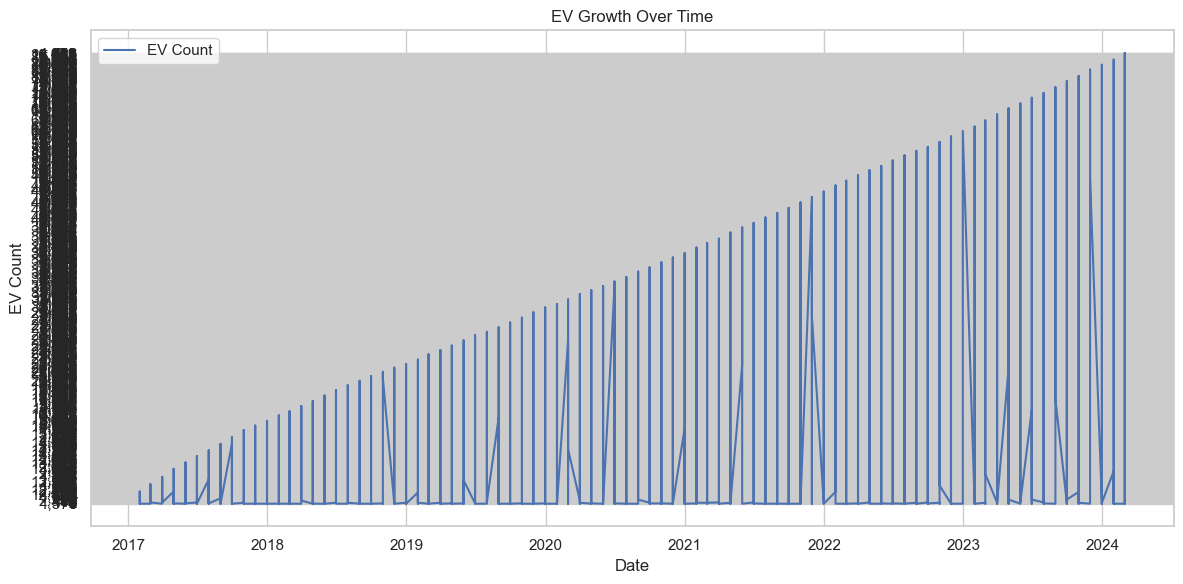

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Electric Vehicle (EV) Total'], label='EV Count')
plt.title('EV Growth Over Time')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.legend()
plt.tight_layout()
plt.savefig("Week2_Images/ev_count_over_time.png")
plt.show()

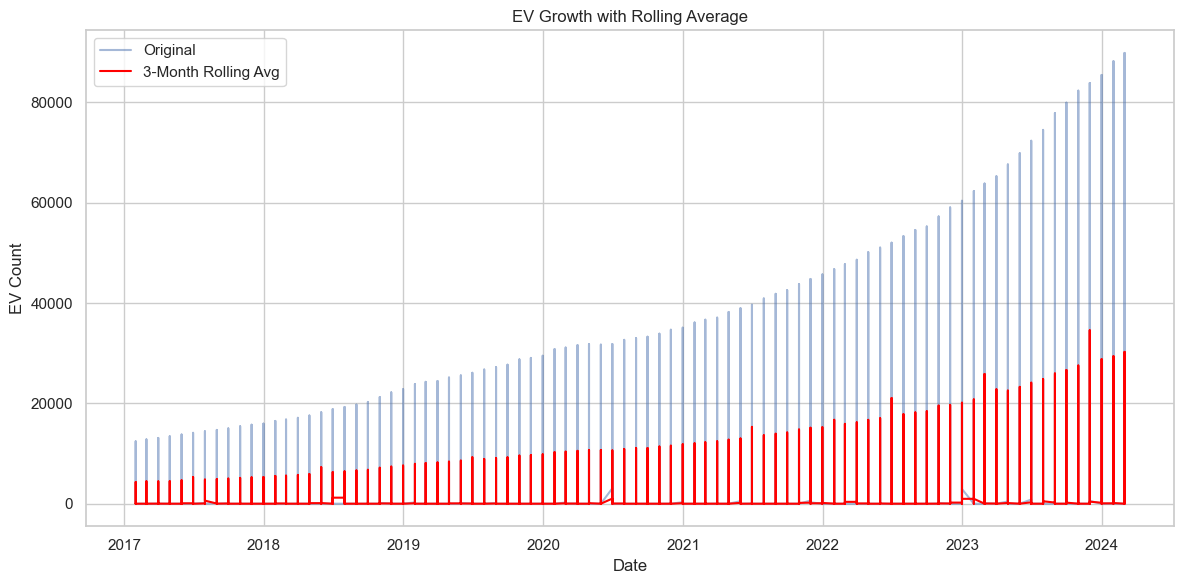

In [13]:
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].str.replace(',', '', regex=False)
df['Electric Vehicle (EV) Total'] = pd.to_numeric(df['Electric Vehicle (EV) Total'], errors='coerce')
df['EV_Rolling'] = df['Electric Vehicle (EV) Total'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Electric Vehicle (EV) Total'], label='Original', alpha=0.5)
plt.plot(df.index, df['EV_Rolling'], label='3-Month Rolling Avg', color='red')
plt.title('EV Growth with Rolling Average')
plt.xlabel('Date')
plt.ylabel('EV Count')
plt.legend()
plt.tight_layout()
plt.savefig("Week2_Images/ev_growth_rolling.png")
plt.show()

C:\Users\Mr\AppData\Local\Temp\ipykernel_2832\2111177740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='mako')


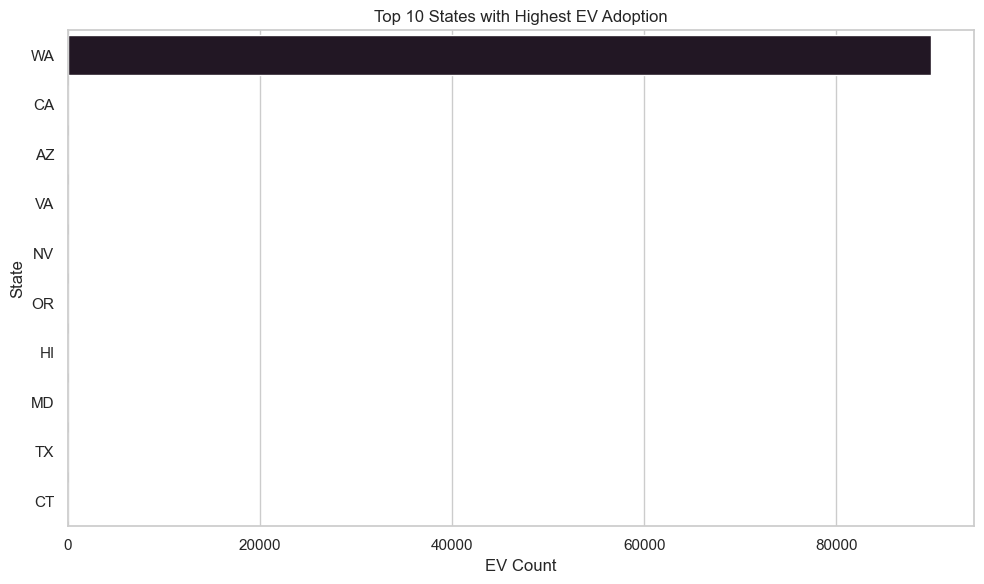

In [14]:
top_states = df.groupby('State')['Electric Vehicle (EV) Total'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, palette='mako')
plt.title('Top 10 States with Highest EV Adoption')
plt.xlabel('EV Count')
plt.tight_layout()
plt.savefig("Week2_Images/top_states_ev.png")
plt.show()

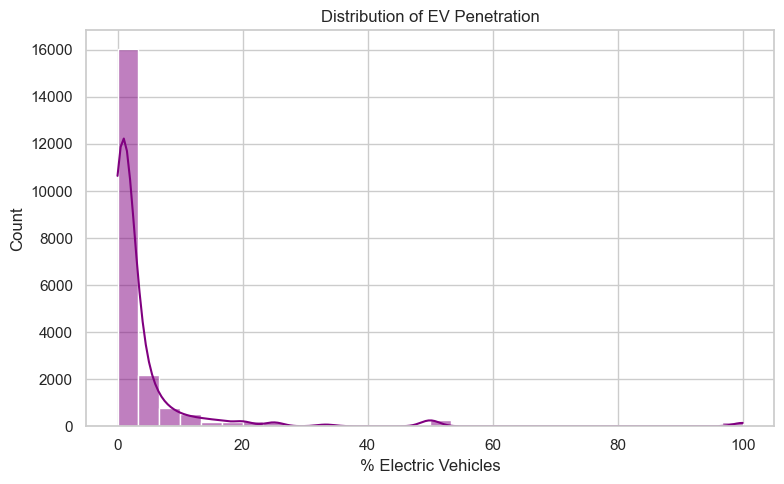

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Percent Electric Vehicles'], bins=30, kde=True, color='purple')
plt.title('Distribution of EV Penetration')
plt.xlabel('% Electric Vehicles')
plt.tight_layout()
plt.savefig("Week2_Images/ev_percent_distribution.png")
plt.show()

In [16]:
print(df.columns)

Index(['County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles', 'EV_Rolling'],
      dtype='object')


C:\Users\Mr\AppData\Local\Temp\ipykernel_2832\1545758950.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


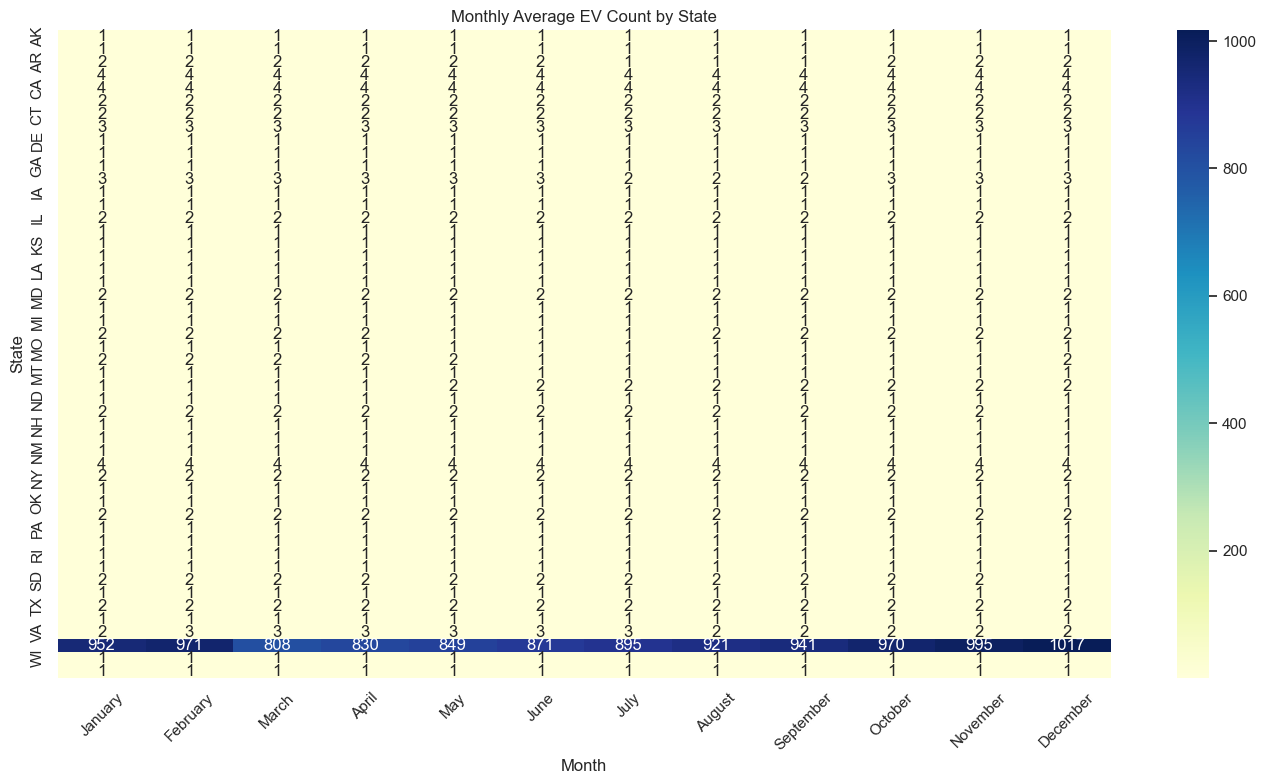

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ev_data_cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].replace(',', '', regex=True).astype(float)

# Create pivot table
pivot_table = df.pivot_table(
    values='Electric Vehicle (EV) Total',
    index='State',
    columns='Month',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Monthly Average EV Count by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Week2_Images/state_month_heatmap.png") 
plt.show()

In [18]:
# Convert both columns from string to float
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].replace(',', '', regex=True).astype(float)
df['Total Vehicles'] = df['Total Vehicles'].replace(',', '', regex=True).astype(float)


df['Percent Electric Vehicles'] = (df['Electric Vehicle (EV) Total'] / df['Total Vehicles']) * 100

C:\Users\Mr\AppData\Local\Temp\ipykernel_2832\25068585.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['State'].isin(top_states_list)],


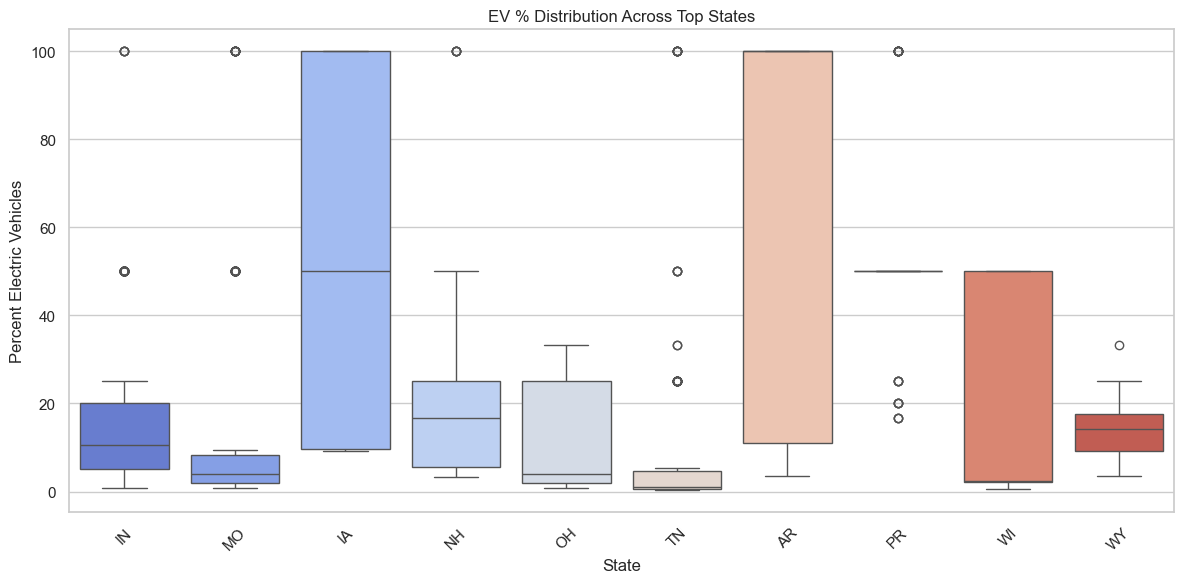

In [19]:
# Group by state and compute average EV %
state_avg = df.groupby('State')['Percent Electric Vehicles'].mean().sort_values(ascending=False)

# Select top 10 states
top_states = state_avg.head(10)
top_states_list = top_states.index.tolist()

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['State'].isin(top_states_list)],
            x='State',
            y='Percent Electric Vehicles',
            palette='coolwarm')
plt.title('EV % Distribution Across Top States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Week2_Images/ev_percent_boxplot.png")
plt.show()

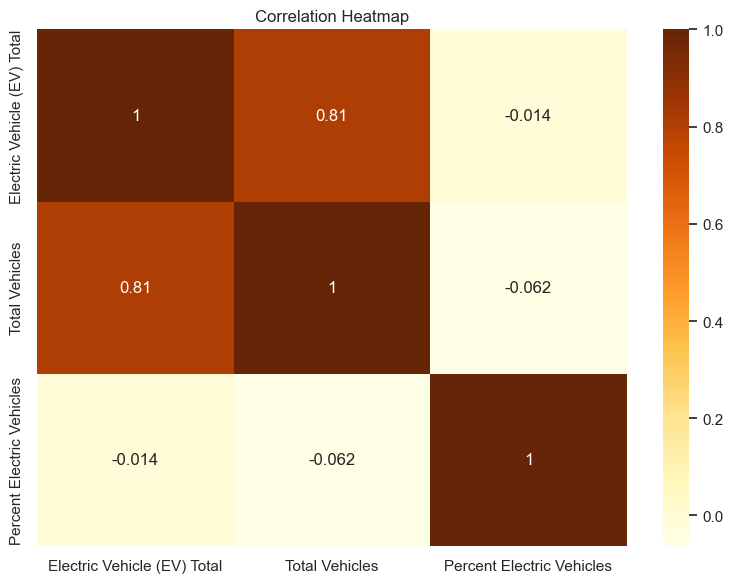

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("Week2_Images/correlation_heatmap.png")
plt.show()

In [21]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# STEP 2: Load Dataset
df = pd.read_csv("EV_data_cleaned.csv")
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [22]:
df.columns

Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles'],
      dtype='object')

In [23]:
# Define features and target
X = df.drop('Electric Vehicle (EV) Total', axis=1)
y = df['Electric Vehicle (EV) Total']

In [24]:
# Drop the 'Date' column
df = df.drop('Date', axis=1)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['County', 'State', 'Vehicle Primary Use'], drop_first=True)

# Define X and y again using the encoded data
X = df_encoded.drop('Electric Vehicle (EV) Total', axis=1)
y = df_encoded['Electric Vehicle (EV) Total']

In [25]:
# Remove commas and convert numeric columns to float
for col in ['Battery Electric Vehicles (BEVs)', 
            'Plug-In Hybrid Electric Vehicles (PHEVs)',
            'Electric Vehicle (EV) Total',
            'Non-Electric Vehicle Total',
            'Total Vehicles',
            'Percent Electric Vehicles']:
    
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)


In [26]:
# Define features and target again
X = df[['Battery Electric Vehicles (BEVs)', 
        'Plug-In Hybrid Electric Vehicles (PHEVs)',
        'Total Vehicles']]

y = df['Percent Electric Vehicles']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.4f}")

MAE : 0.01
RMSE: 0.13
R²  : 0.9999


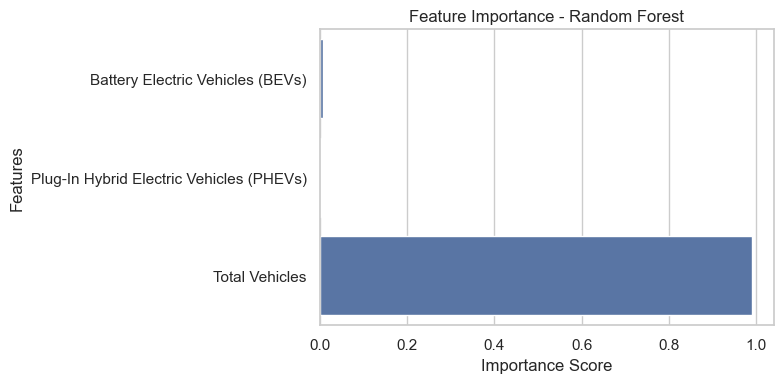

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [30]:
# Re-train the model with best parameters
best_rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_best = best_rf.predict(X_test)

# Evaluate
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("----- Optimized Model Performance -----")
print(f"MAE : {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²  : {r2_best:.4f}")

----- Optimized Model Performance -----
MAE : 0.01
RMSE: 0.12
R²  : 0.9999


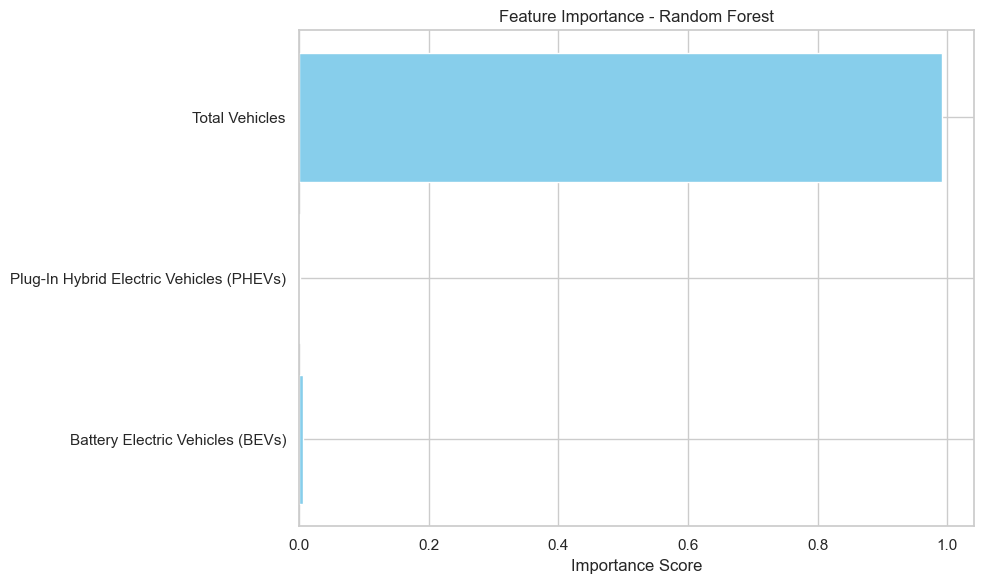

In [31]:
import matplotlib.pyplot as plt

# Feature Importance
importances = best_rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
import joblib

# Save the best model
joblib.dump(best_rf, "optimized_rf_model.pkl")

print("Model saved as 'optimized_rf_model.pkl'")

Model saved as 'optimized_rf_model.pkl'


In [33]:
# Load the saved model
loaded_model = joblib.load("optimized_rf_model.pkl")

# Test prediction
sample = X_test.iloc[[0]]  
predicted_value = loaded_model.predict(sample)

print(f"Predicted Charging Demand: {predicted_value[0]:.2f}")
print(f"Actual Charging Demand   : {y_test.iloc[0]:.2f}")

Predicted Charging Demand: 25.00
Actual Charging Demand   : 25.00


In [34]:
# Save preprocessed data for future use
df.to_csv("cleaned_ev_charging_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_ev_charging_data.csv'")

Cleaned dataset saved as 'cleaned_ev_charging_data.csv'


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
import joblib

# Save model
joblib.dump(rf_model, "random_forest_model.pkl")
print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [37]:
import gradio as gr
import numpy as np
import pandas as pd
import joblib

# Load the model
model = joblib.load("random_forest_model.pkl")

# Define the prediction function
def predict_charging_demand(bevs, phevs, total_vehicles):
    # Input as array
    features = np.array([[bevs, phevs, total_vehicles]])
    prediction = model.predict(features)[0]
    return round(prediction, 2)

# Gradio UI
interface = gr.Interface(
    fn=predict_charging_demand,
    inputs=[
        gr.Number(label="Battery Electric Vehicles (BEVs)"),
        gr.Number(label="Plug-In Hybrid Electric Vehicles (PHEVs)"),
        gr.Number(label="Total Vehicles")
    ],
    outputs=gr.Number(label="Predicted Charging Demand (kWh)"),
    title="EV Charging Demand Predictor",
    description="Predict EV charging demand using vehicle data"
)

interface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
